Observable Trends
1.All but the BBC have a negative sentiment, Fox News was the most negative
2.CNN was the closest to neutral but still had a slightly negative sentiment
3.NY Times and CBS News had similarly negative sentiment but they were less negative than Fox News

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import time
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
#create list of news accounts
news_list=["@BBC", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]
counter = 1
sentiments = []

In [6]:
#Loop through and gather 100 tweets then analyze them

for news in news_list:
    public_tweets = api.user_timeline(news, count=100)
    tweet_number = 1
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweet_number
        sentiments.append({"Media Source": news,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweet_number})
        tweet_number +=1
        counter +=1
        

Tweet 1: The heartbreaking story of the artist who gave the children of this concentration camp art lessons. Their beautiful… https://t.co/gMFqgqgtvg
Tweet 2: Take a detailed look at ambulance services, from the highly pressurised control rooms to the crews on the street. 🚑… https://t.co/ACZOCRjbgS
Tweet 3: Follow a young family of falcons as they grow up in downtown Chicago. 🦅

Natural World: Super Fast Falcon | 8pm |… https://t.co/fDzkfaxMNM
Tweet 4: 😯 This woman from the 1920s looks EXACTLY like Benedict Cumberbatch.  
#TheGNShow https://t.co/ZkdgiM7ZVg
Tweet 5: RT @cbbc: If you can't wait to see @iamradzi on this week's ep of #BluePeter, turn him into an alien on the CBBC Buzz app! 📲🖍️➡️ https://t.…
Tweet 6: 🔥👩‍🚒 These helmets use AR to help firefighters see through smoke. https://t.co/g0807qwa7z
Tweet 7: RT @bbcpress: Ahead of the final episode of #Civilisations, @Simon_Schama reveals his highlights from the series. Civilisations concludes t…
Tweet 8: RT @bbcthree: FYI baby Neil f

Tweet 101: Kim Jong Un walks across border to meet South Korean president -- live updates https://t.co/G0D7Fdg7Ka https://t.co/siZl6zRjDT
Tweet 102: North Korean leader Kim Jong-un has crossed the demilitarized zone (DMZ) and is welcomed by South Korean President… https://t.co/rTzcPn1jLw
Tweet 103: WATCH: North Korean leader Kim Jong-un and South Korean President Moon Jae-in meet before historic summit. The lead… https://t.co/zzwHBB6Zk5
Tweet 104: Amazon plans to increase prices for its Prime subscription service to $119 from $99 per year https://t.co/Bs1o0zpjdB https://t.co/h2tqKZpzAj
Tweet 105: With the first pick in the 2018 #NFLDraft, the Cleveland Browns select Baker Mayfield https://t.co/TqpN75wRmA https://t.co/cEBtmsfFYD
Tweet 106: DNA match on genealogy sites led to suspected "Golden State Killer," police say https://t.co/0jUPMWq04f https://t.co/zKmu6SK6aM
Tweet 107: Charges dropped against teen accused of threatening school shooting in Vermont https://t.co/AAPzhIo6lj https://t

Tweet 201: South Korea's Moon Jae-in has arrived in the demilitarized zone (DMZ) for the inter-Korea summit.… https://t.co/QMjwSWPKt0
Tweet 202: That time Fox News tried to wrap up a Trump interview -- CNN's Jeanne Moos has more https://t.co/T3Nrbtprsk https://t.co/WNNqcUMoDC
Tweet 203: South Korean President Moon Jae-in's motorcade has crossed the Unification Bridge and entered the demilitarized zon… https://t.co/ttJDgbLeE2
Tweet 204: .@camanpour: What do you expect to be the outcome of the North/South summit?

North Korean defector, Thae Yong-ho:… https://t.co/1IwP7dgqtI
Tweet 205: 1 poll number that should be a wake-up call for politicians | Analysis by @CillizzaCNN https://t.co/FzdttniB6q https://t.co/BuYOFJ4s5l
Tweet 206: RT @cnni: South Korea's Moon Jae-in has set off and is en route to the demilitarized zone (DMZ) to meet North Korea's Kim Jong Un. Live upd…
Tweet 207: RT @OutFrontCNN: Sen. Richard Blumenthal calls Trump's comments about the DOJ during his Fox and Friends interv

Tweet 301: NOW: South Korean President Moon Jae-in meets North Korean leader Kim Jong Un for a historic summit.… https://t.co/qxhBR2Bl3J
Tweet 302: BREAKING: North Korea's Kim Jong Un crosses border into South Korea to meet Moon Jae-in for historic summit… https://t.co/oX1sPEdos2
Tweet 303: RT @FoxBusiness: #BreakingNews: South Korean President Moon Jae-in meets North Korean leader Kim Jong Un for a historic summit. https://t.c…
Tweet 304: Cleveland Browns select Baker Mayfield with No. 1 pick in NFL Draft https://t.co/zwZytIqnEC
Tweet 305: Maine deputy's suspected killer seen in new photos; $20G reward announced https://t.co/NphJBNj7BZ
Tweet 306: .@TGowdySC on @Comey #SpecialReport interview: "Jim Comey has a definition of the word 'leak' that no one else has.… https://t.co/bgLrLawqGG
Tweet 307: .@TGowdySC on @Comey interview: "Dir. Comey's recollection is flawed if he does not remember telling Congress that… https://t.co/unoTm8M7Ki
Tweet 308: 'He's Just Wrong': @Comey Pushes Back on 

Tweet 401: Breaking News: Kim Jong-un has stepped into South Korean territory, a first for a North Korean leader, to begin a s… https://t.co/PG5hPTg7SC
Tweet 402: RT @el_belson: When you're not obsessing about the Draft, take a look inside the Confidential N.F.L. Meeting where the owners and players d…
Tweet 403: The Browns took quarterback Baker Mayfield with the first pick in the NFL draft, and the Giants are on the clock. F… https://t.co/hk3gbAMdGo
Tweet 404: RT @el_belson: Huge cheers for Baker Mayfield when the Cleveland Browns selected him with the first pick.
Tweet 405: RT @NYTSports: The last time the Giants picked No. 2 and the Jets picked No. 3 in the NFL draft was 1981. The Jets chose Freeman McNeil. Th…
Tweet 406: We're live at the NFL draft in Texas. Pick-by-pick updates and analysis from the first round. https://t.co/ikDSNECm18
Tweet 407: RT @el_belson: The view from the cheap seats aka the press box at Jerry World aka AT&amp;T Stadium. https://t.co/nhUbRXIaBS
Tweet 408: 

In [7]:
#create dataframe
sentiments_df=pd.DataFrame.from_dict(sentiments)
#restructure
sentiments_reorg= sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
sentiments_reorg.head()


Media Source                            Date  \
0         @BBC  Thu Apr 26 20:05:00 +0000 2018   
1         @BBC  Thu Apr 26 19:03:04 +0000 2018   
2         @BBC  Thu Apr 26 18:33:03 +0000 2018   
3         @BBC  Thu Apr 26 18:01:09 +0000 2018   
4         @BBC  Thu Apr 26 16:08:02 +0000 2018   

                                                Text  Compound  Positive  \
0  The heartbreaking story of the artist who gave...   -0.4588     0.000   
1  Take a detailed look at ambulance services, fr...   -0.1761     0.000   
2  Follow a young family of falcons as they grow ...    0.7506     0.262   
3  😯 This woman from the 1920s looks EXACTLY like...    0.3612     0.185   
4  RT @cbbc: If you can't wait to see @iamradzi o...    0.0000     0.000   

   Neutral  Negative  Tweet Count  
0    0.857     0.143            1  
1    0.918     0.082            2  
2    0.738     0.000            3  
3    0.815     0.000            4  
4    1.000     0.000            5

In [8]:
#create csv
sentiments_reorg.to_csv("news_sentiments.csv", encoding="utf-8", index=False)

In [9]:
# set colors for each news outlet
news_colors={"@BBC": "blue",
             "@CBSNews":"green", 
             "@CNN":"orange",
             "@FoxNews":"red",
             "@nytimes": "yellow"}

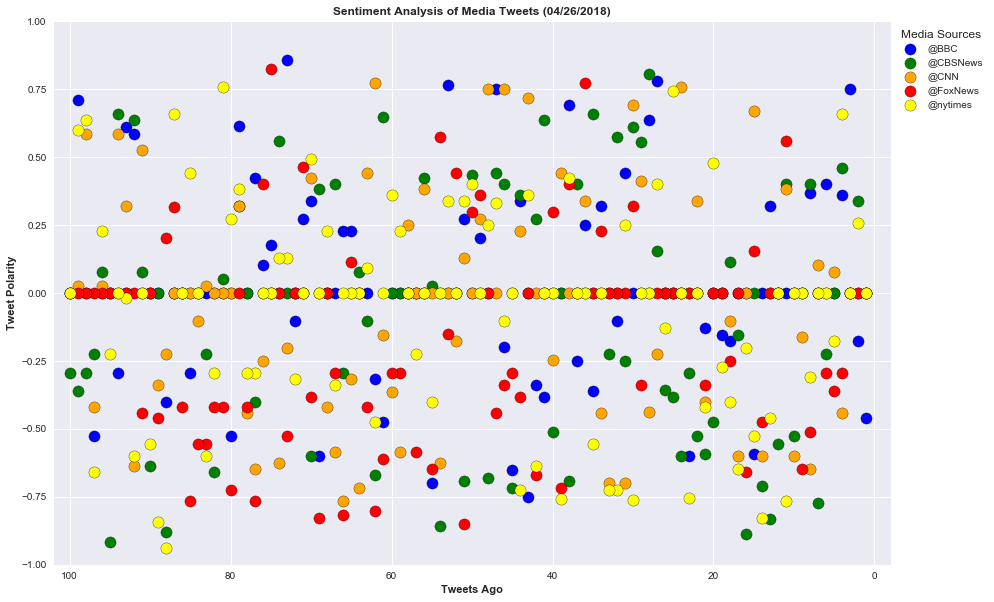

In [10]:
sns.set()
plt.figure(figsize = (15,10))
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
for newsoutlet in news_colors.keys():
    df = sentiments_reorg[sentiments_reorg['Media Source'] == newsoutlet]
    sentiment_analysis = plt.scatter(df["Tweet Count"],df["Compound"], label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black", s=125)
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()
sentiment_analysis.figure.savefig('SentimentAnalysis.png')  

In [11]:
#Get average compound score for each
scoresbyoutlet=sentiments_reorg.groupby("Media Source")["Compound"].mean()
scoresbyoutlet

Media Source
@BBC        0.032173
@CBSNews   -0.067329
@CNN       -0.031768
@FoxNews   -0.137798
@nytimes   -0.071237
Name: Compound, dtype: float64

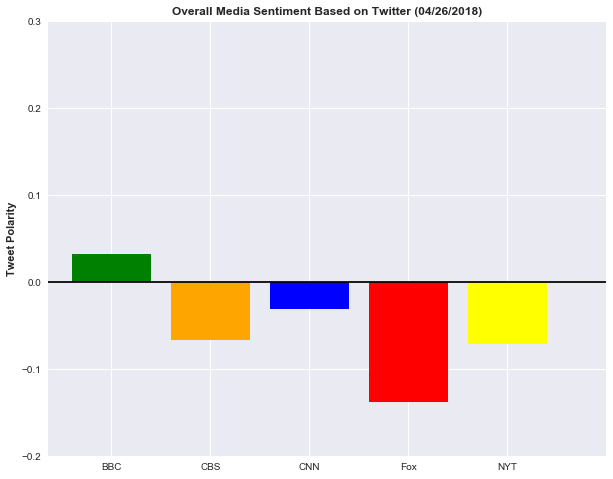

In [16]:
#Create bar chart
x_axis=np.arange(len(scoresbyoutlet))

sns.set()

plt.figure(figsize = (10,8))
for newsoutlet in news_colors.keys():
    df = sentiments_reorg[sentiments_reorg['Media Source'] == newsoutlet]
    
   
    overall_media_sentiment = plt.bar(x_axis,scoresbyoutlet, color = {"blue","green","orange","red","yellow"}, label = newsoutlet)
    
plt.ylim(-.2, .3)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(6)]
plt.xticks(x_locations, x_labels)
plt.savefig('Overall Media Sentiment Based on Twitter.png')
plt.show()